In [1]:
#!pip install scipy matplotlib numpy pandas

In [1]:
import re
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [2]:
#def readStats(confirmedDB, deathDB, recoveredDB, pays):
def readStats(confirmedDB, deathDB, pays):
    stats_confirmed = confirmedDB.loc[confirmedDB['Country/Region'] == pays]
    stats_confirmed = stats_confirmed.iloc[:,4:].sum()
    stats_death = deathDB.loc[deathDB['Country/Region'] == pays]
    stats_death = stats_death.iloc[:,4:].sum()
    #stats_recovered = recoveredDB.loc[recoveredDB['Country/Region'] == pays]
    #stats_recovered = stats_recovered.iloc[:,4:].sum()
    #return stats_confirmed, stats_death, stats_recovered
    return stats_confirmed, stats_death

In [3]:
def getCroissance(liste):
    croissance = []
    croissance.append(liste[0])
    for i in range(1,len(liste)):
        croissance.append(liste[i] - liste[i-1])
    croissance = np.array(croissance)
    return croissance

In [4]:
def getStats(dataset, query):

    pays = query['country']
    #confirmed, death, recovered = readStats(dataset[0], dataset[1], dataset[2], pays)
    confirmed, death = readStats(dataset[0], dataset[1], pays)
    values = []
    graph = []
    gname = []
    if query['graphe']['confirmed']:
        graph.append(confirmed)
        gname.append('confirmed')
    if query['graphe']['death']:
        graph.append(death)
        gname.append('death')
    if query['graphe']['recovered']:
        graph.append(recovered)
        gname.append('recovered')
    if query['graphe']['growth_confirmed']:
        graph.append(getCroissance(confirmed))
        gname.append('growth_confirmed')
    if query['graphe']['growth_death']:
        graph.append(getCroissance(death))
        gname.append('growth_death')
    if query['graphe']['growth_recovered']:
        graph.append(getCroissance(recovered))
        gname.append('growth_recovered')

    xaxis = np.array(dataset[0].axes[1][4:])
    
    plt.figure(figsize=(20, 10))
    
    for i in range(len(graph)):
        values.append((gname[i],np.array(graph[i])))
        if query['normalLaw']:
            X = list(range(len(graph[i])))
            data = []
            for cpt in range(len(graph[i])):
                data.extend([X[cpt]]*graph[i][cpt])
            mu = np.mean(data)
            sigma = np.std(data)
            Y = scipy.stats.norm.pdf(X, mu, sigma)
            coef = np.max(graph[i])/np.max(Y)
            Y2 = Y*coef
            plt.plot(xaxis, graph[i], marker='o',label=gname[i])
            plt.plot(xaxis, Y2, marker='+',label=gname[i]+" normal")
        else:
            plt.plot(xaxis, graph[i], marker='o',label=gname[i])
    
    if (len(graph)>0):
        plt.xticks([i for i in range(len(graph[0]))], rotation='vertical')
    
    plt.title("COVID-19 en "+pays)
    #plt.semilogy()
    plt.legend()
    plt.show()
    
    return values

In [5]:
url1 = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
url2 = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'
#url3 = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv'

confirmed = pd.read_csv(url1)
death = pd.read_csv(url2)
#recovered = pd.read_csv(url3)

#datasets = [confirmed,death,recovered]
datasets = [confirmed,death]

In [5]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


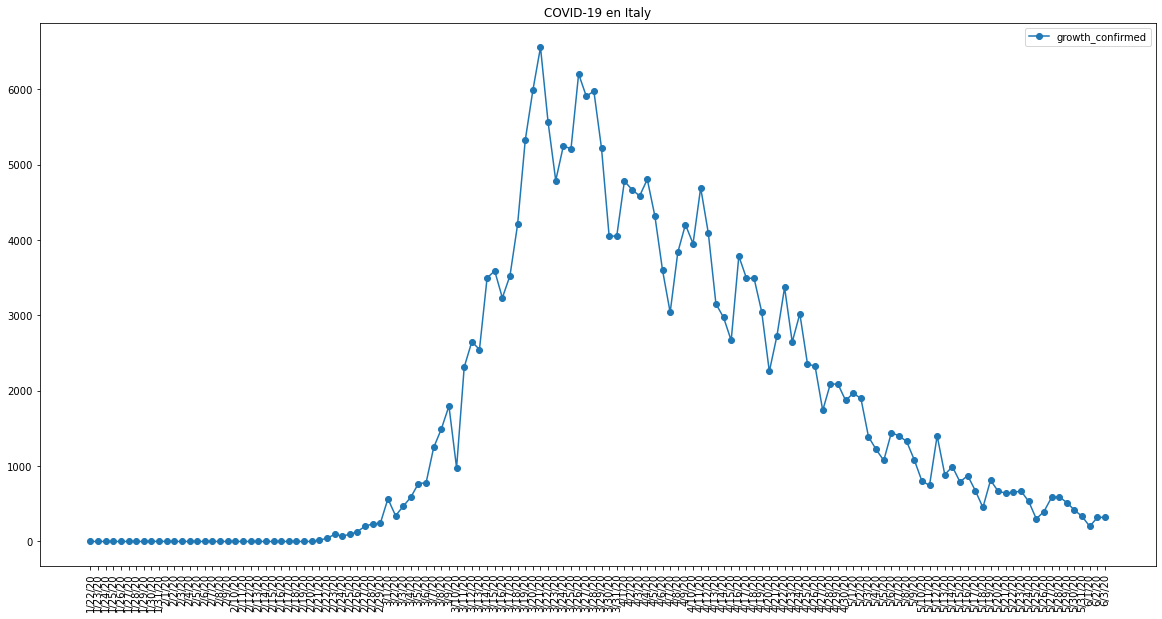

In [9]:
query = {
    'country':'Italy',
    #ajouter les lois normales pour chaque courbe.
    #/!\ prendre du recul sur les résultats !! comme on ne connaît pas encore le pic de la courbe dans certains pays.
    'normalLaw':False,
    'graphe': {
        #inutile de mettre une loi normale avec les cas cumulés
        'confirmed':False, #cas confirmés cumulés
        'death':False, #morts cumulées
        'recovered':False, #rémissions cumulées
        #utilisation d'une loi normale possible
        'growth_confirmed':True, #cas confirmés croissance
        'growth_death':False, #morts croissance
        'growth_recovered':False, #rémissions croissance
    }
}
res = getStats(datasets, query)

In [6]:
def getGrowthMat(mat):
    res = []
    for i in range(len(mat)):
        res.append(getCroissance(mat.iloc[i,:]))
    res = np.array(res)
    return res

In [11]:
confirmed_mat = confirmed.iloc[:,4:]
columns = confirmed_mat.columns
growth_confirmed = getGrowthMat(confirmed_mat)
df = pd.DataFrame(data=growth_confirmed, columns=columns)
growth_confirmed = confirmed.iloc[:,:4].join(df)

In [12]:
growth_confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,492,531,540,782,584,591,658,625,580,623
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,5,12,8,9,6,25,21,26,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,165,186,190,195,193,197,194,160,140,137


In [44]:
def countNbJours(Y):
    return np.argmax(Y, axis=1) - np.argmax(np.cumsum(Y, axis=1)>0, axis=1)

In [46]:
dfConfirmed = growth_confirmed.copy()
dfConfirmed['metric_startToMax'] = 0
dfConfirmed = dfConfirmed.drop(['metric_startToMax'], axis=1)
dfConfirmed['metric_startToMax'] = countNbJours(np.array(growth_confirmed.iloc[:,4:]))
dfConfirmed.sort_values(by='metric_startToMax', ascending=True)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,metric_startToMax
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
195,NaN,Seychelles,-4.679600,55.492000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,NaN,United Arab Emirates,24.000000,54.000000,0,0,0,0,0,0,...,894,994,812,781,822,779,883,563,638,114
131,NaN,India,21.000000,78.000000,0,0,0,0,0,0,...,6198,6568,6629,7113,6414,5843,7293,7300,8105,120
182,NaN,Philippines,13.000000,122.000000,0,0,0,0,0,0,...,213,163,180,258,284,350,380,539,1046,120
202,NaN,Sri Lanka,7.000000,81.000000,0,0,0,0,0,1,...,27,13,21,52,41,137,150,61,28,121


In [ ]:
dfConfirmed.to_csv

# FAIRE DE LA REGRESSION LOGISTIQUE
### pas fonctionnel

def make_mat_poly_biais(X):
    N = len(X)
    return np.hstack((X.reshape(N,1)**3, X.reshape(N,1)**2, X.reshape(N,1), np.ones((N,1))))

Xe = make_mat_poly_biais(X)
A = np.dot(Xe.T, Xe)
B = np.dot(Xe.T, Y)
w = np.linalg.solve(A,B)

yhat=(Xe*w).sum(1)
plt.figure()
plt.plot(X, Y, 'b+')
plt.plot(X, yhat, 'r')

def deriver(x, w):
    return 3*w[0] * X**2 + 2*w[1] * X + w[2]

deriver(X, w)

def gradient(X, Y, learning_rate, nbIter):
    w = np.zeros(len(X[0]))
    i = 0
    while i<nbIter:
        c = np.dot(2*X.T, np.dot(X,w)-Y)
        w = w - learning_rate*c
        i+=1
    return w

gradient(Xe, Y, 0.001, 100)